# Exploratory Data Analysis (EDA) — Complete Dataset

This notebook provides a comprehensive exploratory data analysis (EDA) of the `complete_dataset.csv`, which consolidates particle sensor readings from simulation experiments involving multiple emission points (E1, E2, E3).

The primary goals of this analysis are to:

- Understand the structure and contents of the dataset
- Assess data quality and sensor behavior over time
- Examine the distributions of environmental and simulation parameters
- Investigate the relationship between sensor data and emission classes
- Identify any temporal or spatial patterns that may support downstream modeling
- Detect potential outliers or inconsistencies

---

## Analysis Outline

1. General Overview of the Dataset  
2. Sensor Structure and Quality Assessment  
3. Distribution of Environmental and Simulation Variables  
4. Temporal Behavior Across Simulations  
5. Inter-Sensor Correlation Analysis  
6. Class Separability and Dimensionality Reduction  
7. Analysis Grouped by Simulation (`tag`)  
8. *(Optional)* Time Series Pattern Exploration

---

The insights gained here will support model design decisions, such as feature selection, normalization strategies, architecture choices (e.g., MLP, CNN, LSTM), and data validation techniques.

### General Overview of The Dataset
This block offers an initial and confiable view to validate the dataset, if it was correctly loaded and if it has any problems.

In [1]:
import pandas as pd

# Load dataset
dataset_path = "../data/processed/dataset_timeseries.csv"
df = pd.read_csv(dataset_path)

# Display shape and column types
print("Dataset shape:", df.shape)
print("\nData types summary:")
print(df.dtypes.value_counts())

# Show a preview of the data
print("\nFirst 5 rows:")
display(df.head())

# Check for missing values
print("\nMissing values per column (top 10):")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing.head(10) if not missing.empty else "No missing values.")

# Count emission class distribution
print("\nEmission class distribution:")
print(df['classe'].value_counts())

Dataset shape: (22952, 9901)

Data types summary:
float64    9900
object        1
Name: count, dtype: int64

First 5 rows:


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f9891,f9892,f9893,f9894,f9895,f9896,f9897,f9898,f9899,classe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.37827,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.37827,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.37827,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.37827,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.37827,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E1



Missing values per column (top 10):


'No missing values.'


Emission class distribution:
classe
E1    7938
E2    7938
E3    7076
Name: count, dtype: int64


### Sensor Structure and Quality Assessment
This block indentify wich sensor realy has useful information, wich can be discarded and if was visual clues of class separation with sensors basement.

Initial number of sensor columns: 9900
Number of constant or null sensors: 3090
Removed sensors:
['f0', 'f6', 'f15', 'f17', 'f26', 'f28', 'f35', 'f37', 'f39', 'f45', 'f46', 'f48', 'f53', 'f55', 'f61', 'f70', 'f72', 'f75', 'f77', 'f79', 'f81', 'f83', 'f85', 'f89', 'f90', 'f92', 'f94', 'f97', 'f100', 'f101', 'f103', 'f105', 'f108', 'f109', 'f110', 'f112', 'f114', 'f115', 'f116', 'f118', 'f120', 'f122', 'f125', 'f127', 'f128', 'f130', 'f132', 'f134', 'f136', 'f138', 'f140', 'f142', 'f144', 'f145', 'f147', 'f149', 'f151', 'f152', 'f154', 'f155', 'f156', 'f158', 'f160', 'f162', 'f163', 'f164', 'f191', 'f202', 'f211', 'f213', 'f218', 'f220', 'f235', 'f240', 'f246', 'f252', 'f255', 'f257', 'f262', 'f265', 'f266', 'f268', 'f273', 'f275', 'f277', 'f279', 'f281', 'f283', 'f285', 'f287', 'f290', 'f292', 'f297', 'f299', 'f301', 'f303', 'f309', 'f310', 'f312', 'f314', 'f320', 'f321', 'f323', 'f330', 'f336', 'f345', 'f347', 'f356', 'f358', 'f365', 'f367', 'f369', 'f375', 'f376', 'f378', 'f383', 'f38

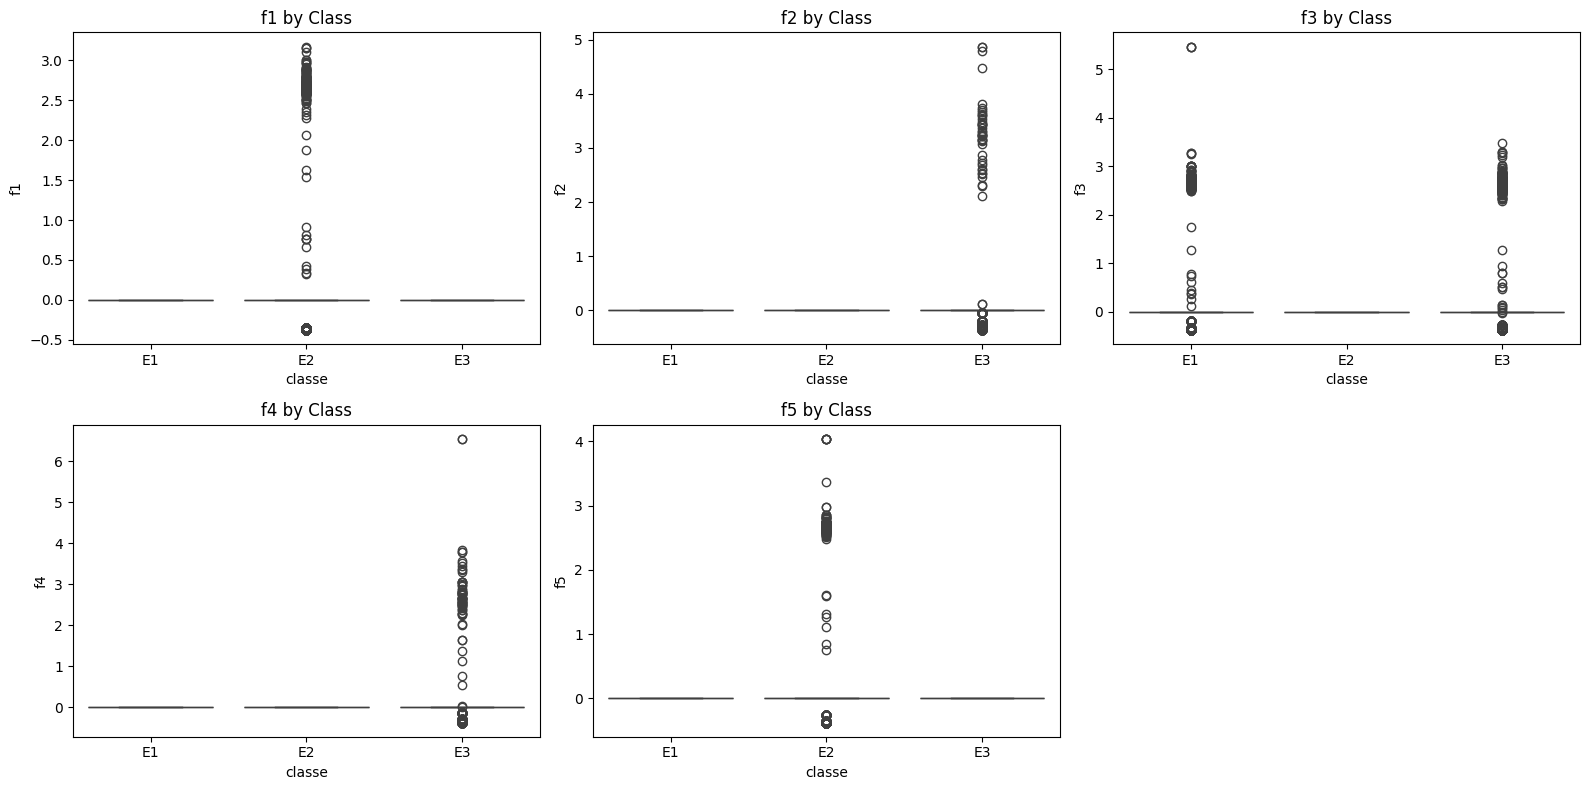

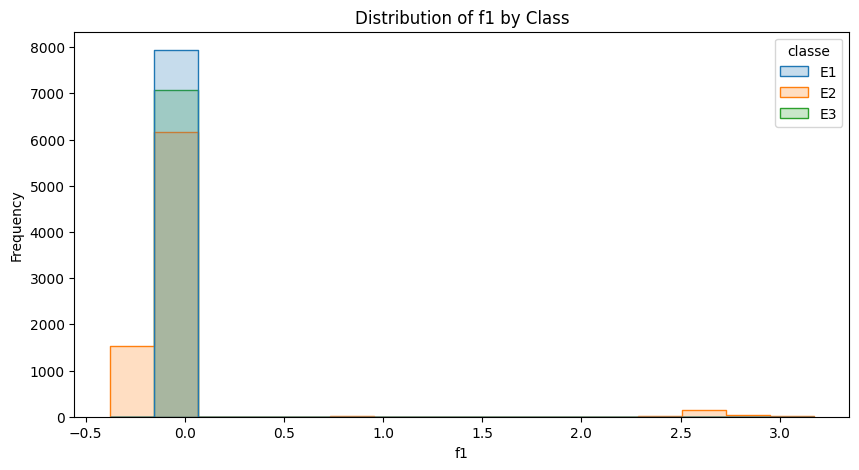

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detect sensor columns (all except the label)
sensor_cols = [col for col in df.columns if col != 'classe']

print(f"Initial number of sensor columns: {len(sensor_cols)}")

# Identify constant or empty sensors
constant_sensors = [col for col in sensor_cols if df[col].nunique() <= 1 or df[col].isnull().all()]
print(f"Number of constant or null sensors: {len(constant_sensors)}")
print("Removed sensors:")
print(constant_sensors)

# Remove constant sensors from the DataFrame
df = df.drop(columns=constant_sensors)

# Update sensor column list
sensor_cols = [col for col in df.columns if col != 'classe']
print(f"Remaining sensor columns: {len(sensor_cols)}")

# Boxplots for first 5 valid sensors
sample_sensors = sensor_cols[:5]
plt.figure(figsize=(16, 8))
for i, sensor in enumerate(sample_sensors):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='classe', y=sensor, data=df)
    plt.title(f"{sensor} by Class")
    plt.tight_layout()
plt.show()

# Histogram of the first selected sensor
selected_sensor = sensor_cols[0]
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x=selected_sensor, hue='classe', element='step')
plt.title(f"Distribution of {selected_sensor} by Class")
plt.xlabel(selected_sensor)
plt.ylabel("Frequency")
plt.show()

#### Sensor Distribution Analysis Summary

During this step, we analyzed the distribution and discriminative potential of particle sensor readings from the time-windowed dataset (`dataset_timeseries.csv`).

##### Key Findings:

- **Initial number of sensor columns:** 9900 (flattened from 30 time steps × ~330 sensors)
- **Sensors with constant or null values:** 94  
  These were identified and excluded during analysis.
- These constant sensors represent approximately **0.95% of all flattened features**, but their removal helps avoid noise and redundancy.

##### Observations from Visual Analysis:

- Sensors such as `f1`, `f2`, `f4`, and `f5` exhibit **class-specific activation**, with spikes in values that appear only for one emission class (E2 or E3).
- For example:
  - `f1` and `f5` show strong variation primarily for class **E2**
  - `f2` and `f4` are more indicative of class **E3**
- These class-specific activations, while sparse, are **valuable for discriminating between emission points**.
- Most other sensors show a large concentration of zero values, especially in classes not linked to their activation region — which is expected due to the spatial nature of particle dispersion.

##### Actionable Decisions:

- **Retain sparse but class-informative sensors**, even if most values are zero — as long as they show relevant variation for at least one class.
- **Exclude only constant sensors** (`std = 0`) or fully null columns.
- These findings support the design of models that can learn from spatial activation patterns, such as CNNs and LSTMs.

The updated list of excluded constant features has been saved in  
📄 `data/processed/sensor_constantes.txt`  
and will be applied in the preprocessing step of model training.

### Distribution of Enviromental and Simulation Variables
In this section, we analyze the distribution of key simulation parameters, including wind direction, wind speed, emission interval, and emission height. The objective is to identify outliers, understand their overall ranges, and evaluate potential class-specific patterns.

C:\Users\JC INFO\anaconda3\envs\tf-gpu\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\JC INFO\anaconda3\envs\tf-gpu\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


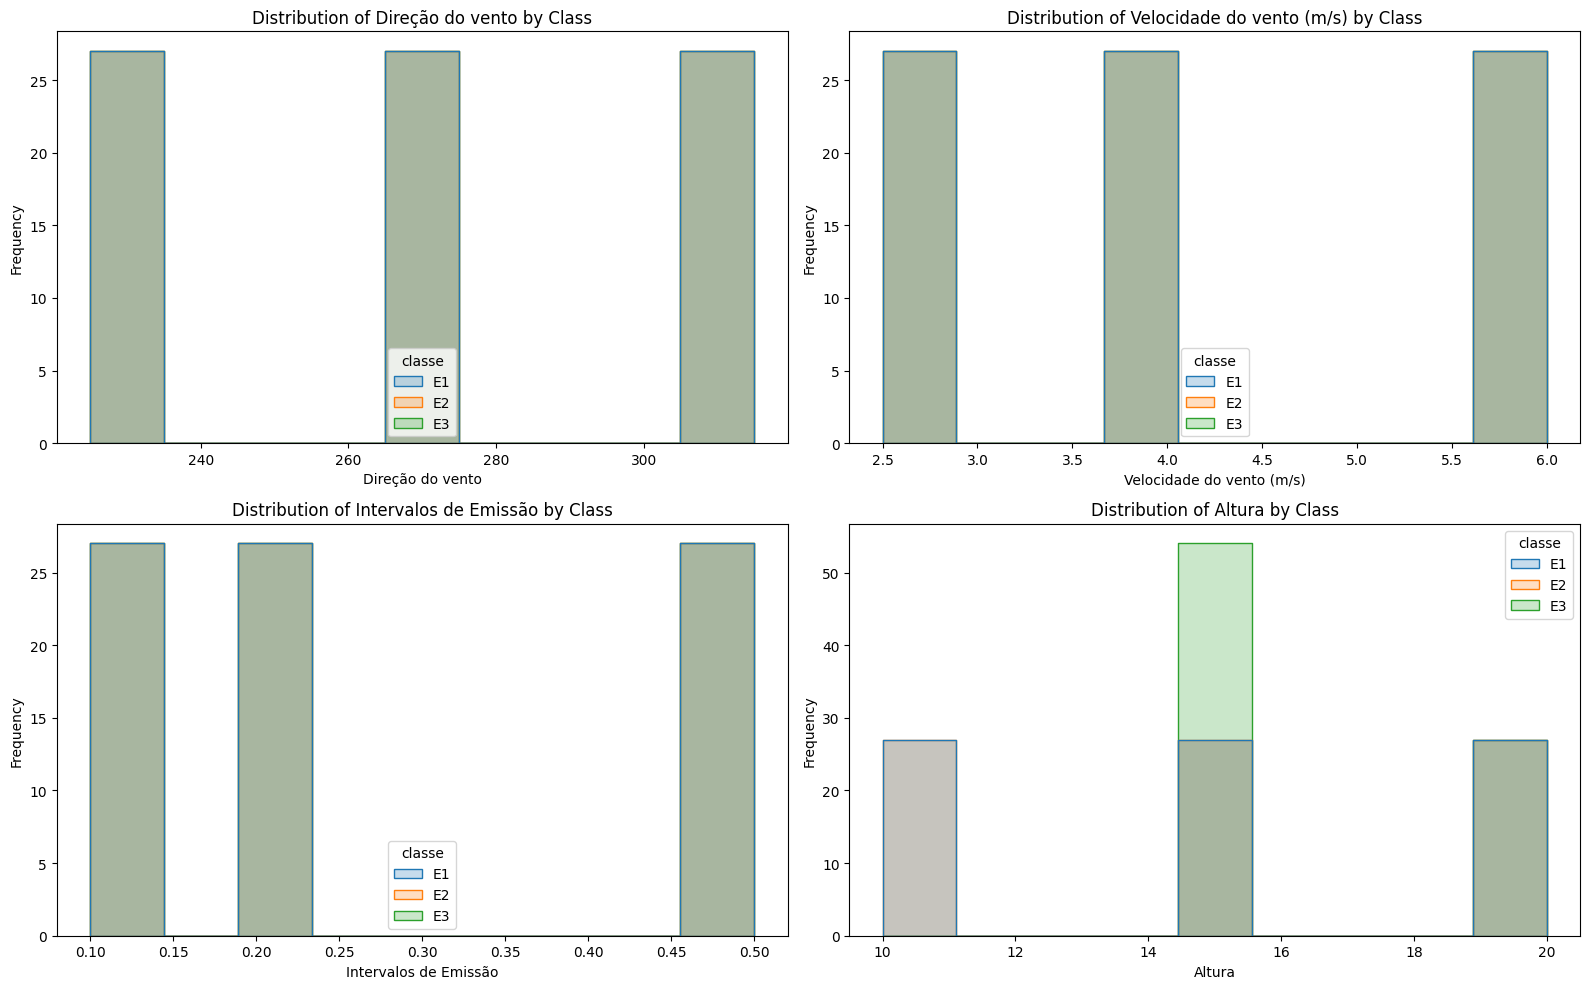

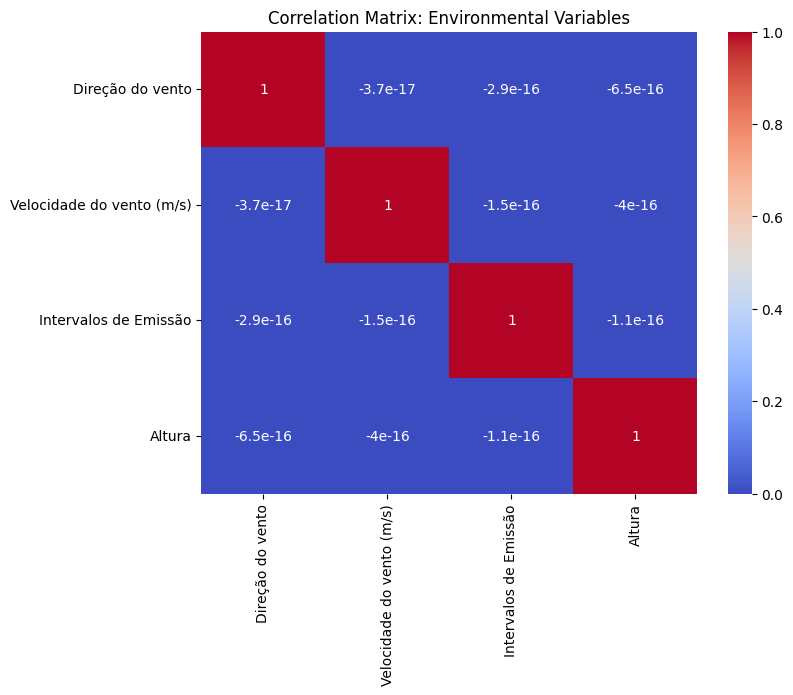

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load metadata
meta = pd.read_excel("../data/raw/metadata.xlsx")
meta.columns = [col.strip() for col in meta.columns]
meta.rename(columns={"TAG (SUBPASTA)": "tag", "Locais de emissão": "classe"}, inplace=True)

env_vars = ['Direção do vento', 'Velocidade do vento (m/s)', 'Intervalos de Emissão', 'Altura']

# Histograms per variable
plt.figure(figsize=(16, 10))
for i, var in enumerate(env_vars):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=meta, x=var, hue='classe', kde=False, element='step')
    plt.title(f"Distribution of {var} by Class")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = meta[env_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: Environmental Variables")
plt.show()


#### Summary

In this section, we analyzed the distribution and correlation of key simulation parameters across all emission classes (E1, E2, E3). These variables include wind direction, wind speed, emission interval, and emission height.

##### Key Findings

- All four environmental variables are **discrete** and take on a limited set of predefined values.
- Their distributions are **uniform across classes**, meaning that these variables were **balanced by design** in the simulation setup.
- There is **no observable correlation** between any pair of environmental variables. This is confirmed by the correlation matrix showing values effectively equal to zero across the board.

##### Variable Distributions by Class

- **Direção do vento** (Wind Direction): Appears equally distributed across all classes with three dominant values.
- **Velocidade do vento (m/s)** (Wind Speed): Similarly well-balanced across classes, with fixed values (e.g., 2.5, 4.0, 6.0).
- **Intervalos de Emissão** (Emission Interval): Also evenly split across classes, suggesting it won’t bias class predictions.
- **Altura** (Height): Slight variation between classes, with a slightly higher frequency of mid-range values (e.g., 15) for class E3.

##### Actionable Conclusions

- Environmental variables **should not be used as direct predictors** for classifying emission sources, as they do not vary meaningfully across classes.
- However, these variables can be **included as auxiliary inputs** to LSTM or CNN models to:
  - Provide context to the sequence window
  - Potentially improve generalization
- Including them as constant features within each window (e.g., concatenated per timestep or passed as separate vector input) is technically feasible and may be beneficial.

##### Final Note

The low correlation between variables and uniform class distribution confirm that the simulation design avoided unintended class leakage via environmental parameters. This supports a fair training setup for models based solely on sensor dynamics.


### Temporal Behavior Across Simulations
This section focuses on exploring how sensor values evolve over time within individual simulations. The goal is to detect patterns, trends, or anomalies in the time series that could aid sequence-based modeling (e.g., with CNNs or LSTMs). We will visualize time-series curves for selected sensors and investigate whether their dynamics differ across emission classes.

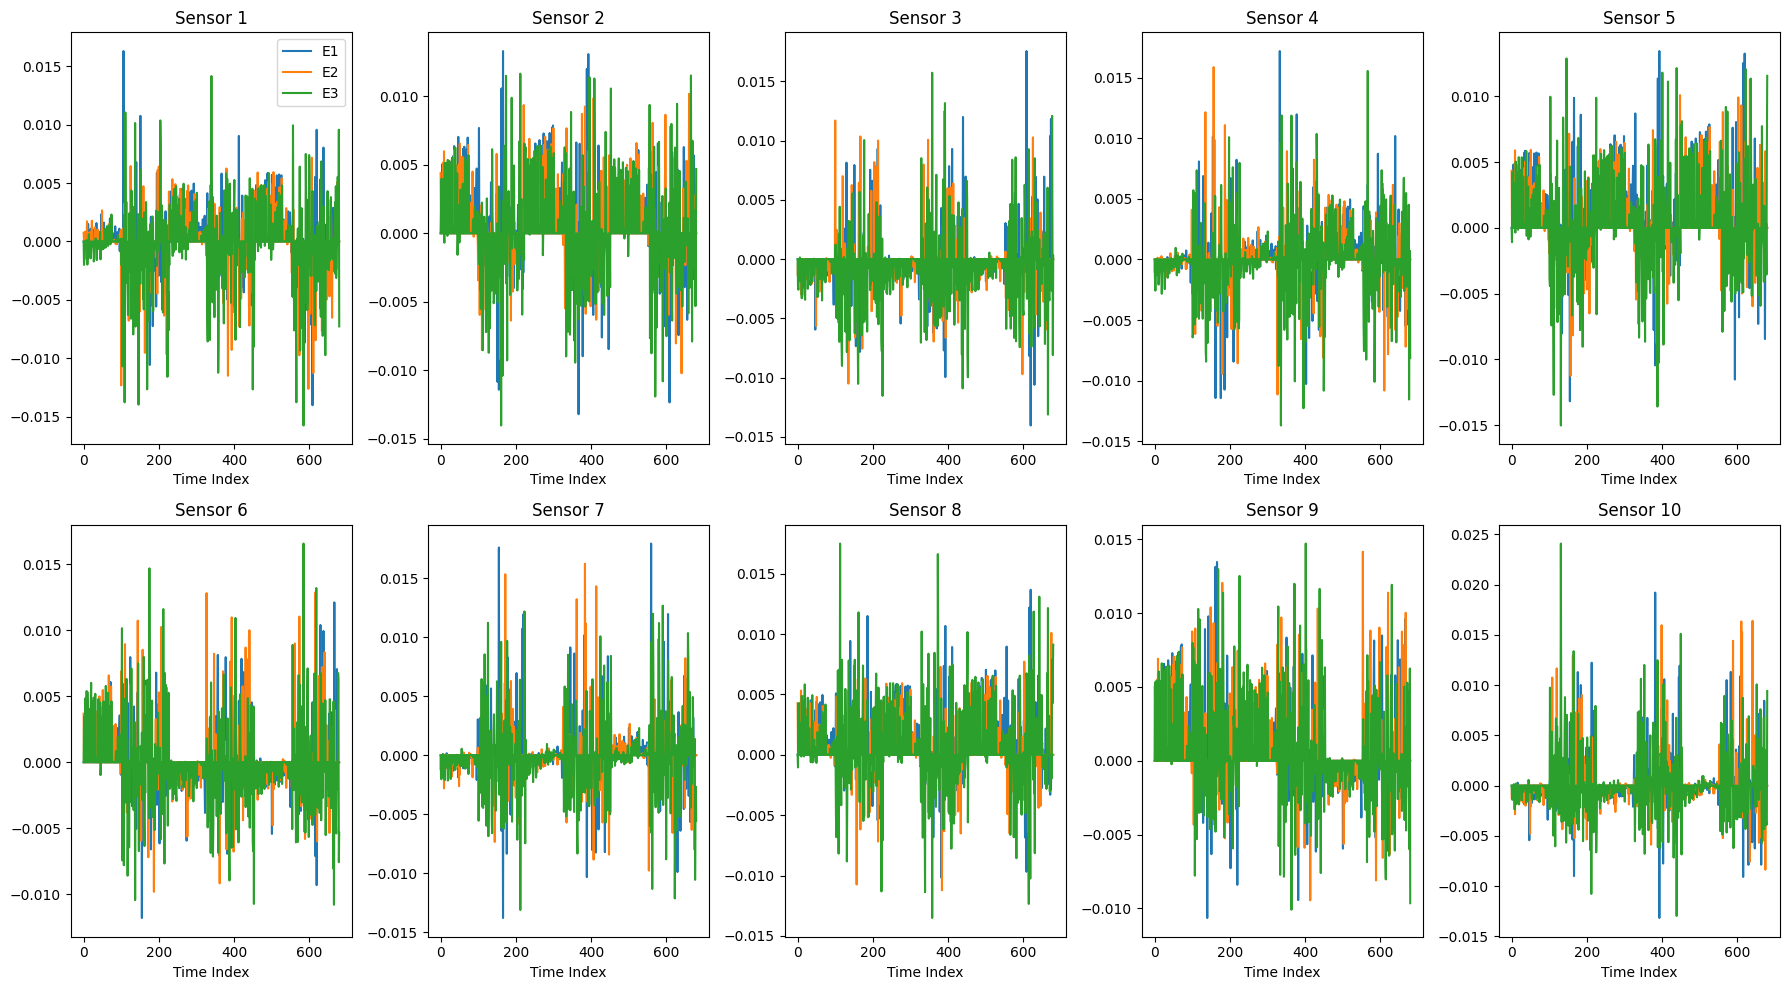

In [4]:
# ===== Temporal Behavior Across Simulations =====
import numpy as np

# extrai apenas as colunas de sensor (f0…f9899)
sensor_cols = [c for c in df.columns if c.startswith('f')]
n_features = len(sensor_cols)

# supondo que sejam 10 sensores e cada um com time_series_length pontos
n_sensors = 10
time_points = n_features // n_sensors

# reshape em (n_amostras, n_sensors, time_points)
data_array = df[sensor_cols].values.reshape(-1, n_sensors, time_points)

classes = df['classe'].unique()

plt.figure(figsize=(18, 10))
for i in range(n_sensors):
    plt.subplot(2, 5, i+1)
    for cls in classes:
        idx = df.index[df['classe'] == cls]
        mean_ts = data_array[idx, i, :].mean(axis=0)
        plt.plot(mean_ts, label=cls)
    plt.title(f"Sensor {i+1}")
    plt.xlabel("Time Index")
    if i == 0:
        plt.legend()
plt.tight_layout()
plt.show()

#### Summary – Temporal Behavior Across Simulations

In this cell, we plotted the mean time‐series of each sensor for classes E1, E2 and E3.

##### Key Findings
- All sensors **oscillate around zero** with intermittent high-magnitude peaks in both directions.  
- The three classes’ average curves **largely overlap**, indicating similar baseline dynamics.  
- **E3** often shows **slightly larger peak amplitudes** (notably on Sensor 10), hinting at more intense transients.

##### Sensor Dynamics by Class
- **E1** and **E2** share very similar fluctuation patterns, differing mainly in peak timing.  
- **E3** exhibits more pronounced excursions from zero, suggesting stronger emission events.

##### Actionable Conclusions
- **Sequence models (CNN/LSTM)** should ingest full time-series to capture transient peaks.  
- Consider **peak detection** or **windowed statistics** as engineered features to emphasize class-specific events.

##### Final Note
Despite strong overlap, subtle amplitude differences—especially in E3—motivate targeted feature extraction around extreme events for improved classification.

### Inter-Sensor Correlation Analysis
This step investigates the relationships between particle sensors by computing the pairwise correlation matrix. The goal is to detect groups of highly correlated sensors, which may indicate redundancy or opportunities for dimensionality reduction. We also aim to identify sensors that are strongly independent and may contribute complementary information to the model.


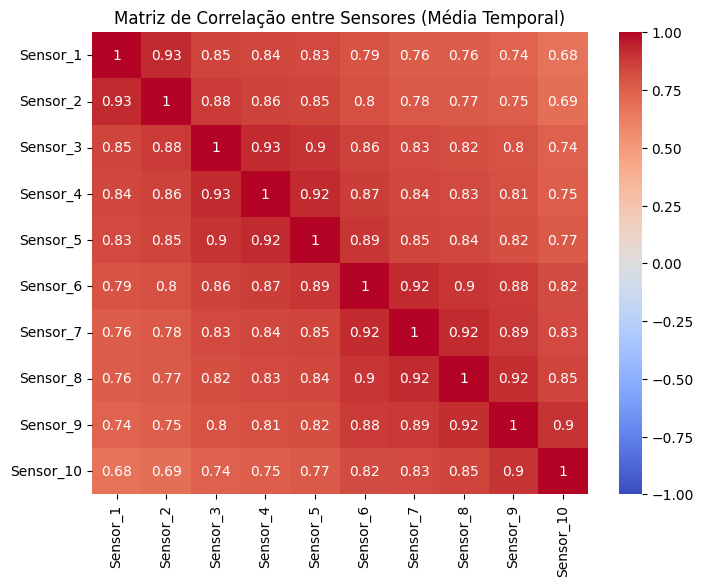

In [5]:
# ===== Inter-Sensor Correlation Analysis =====
# vamos resumir cada sensor em uma única estatística (média ao longo do tempo)
sensor_means = data_array.mean(axis=2)  # shape = (n_amostras, n_sensors)

# monta DataFrame para correlação
sensor_mean_df = pd.DataFrame(
    sensor_means,
    columns=[f"Sensor_{i+1}" for i in range(n_sensors)]
)

plt.figure(figsize=(8, 6))
corr = sensor_mean_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlação entre Sensores (Média Temporal)")
plt.show()

#### Summary – Inter-Sensor Correlation Analysis

In this cell, we computed the Pearson correlation matrix of the 10 sensors’ mean values over time.

##### Key Findings
- **High overall redundancy:** correlations range from **0.68 to 1.00**, all positive.  
- **Adjacent sensors** are most correlated (e.g., Sensor 3↔4 = 0.93; Sensor 7↔8 = 0.92).  
- **Distant sensors** still show substantial correlation (e.g., Sensor 1↔10 = 0.68), indicating broad signal coherence.

##### Correlation Highlights
- Strong clusters between sensors 3–6 (r ≥ 0.86), suggesting they capture very similar patterns.  
- Slightly lower correlation at the edges of the array, hinting at marginally unique local information.

##### Actionable Conclusions
- Apply **feature selection** or **PCA** to reduce input dimensionality and noise.  
- Group or aggregate highly correlated sensors (e.g., by averaging adjacent pairs) to simplify the feature set.

##### Final Note
The pervasive inter-sensor correlation justifies dimensionality reduction; retaining all raw channels risks redundant inputs and overfitting.
|

### Class Separability and Dimensionality Reduction

In this step, we apply unsupervised dimensionality reduction techniques to visualize whether the sensor data forms distinct clusters corresponding to each emission class (E1, E2, E3). We use Principal Component Analysis (PCA) for linear projection and t-distributed Stochastic Neighbor Embedding (t-SNE) for non-linear manifold visualization.

The goal is to determine whether the raw or reduced sensor data exhibits natural separation between classes, which would justify supervised learning.

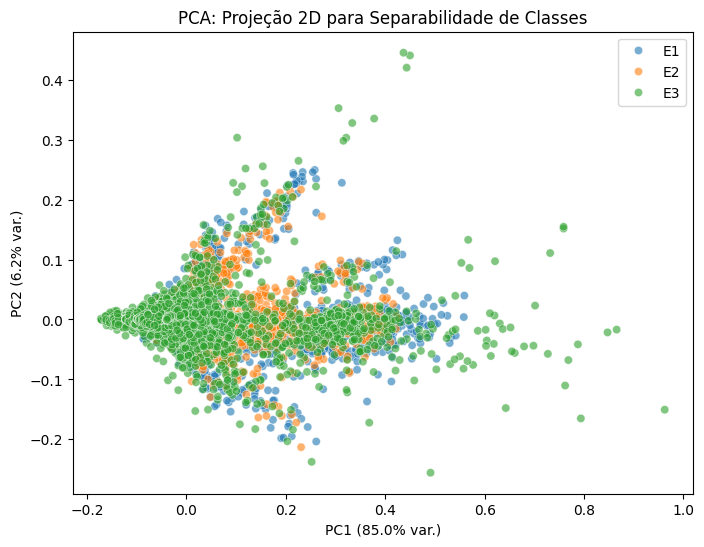

In [6]:
# ===== Class Separability and Dimensionality Reduction =====
from sklearn.decomposition import PCA

# PCA sobre as médias de cada sensor
pca = PCA(n_components=2)
proj = pca.fit_transform(sensor_mean_df)

pca_df = pd.DataFrame(proj, columns=["PC1", "PC2"])
pca_df["classe"] = df["classe"]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="classe",
    alpha=0.6
)
plt.title("PCA: Projeção 2D para Separabilidade de Classes")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var.)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var.)")
plt.legend()
plt.show()


#### Summary – Class Separability via PCA (2D Projection)

In this cell, we projected each sample onto the first two principal components and colored by class.

##### Key Findings
- **PC1 explains 85.0%** of total variance; **PC2 explains 6.2%**, capturing > 91% of information.  
- The 2D scatter shows **heavy overlap** among E1, E2 and E3.  
- **E3** points tend to spread further along **PC2**, but E1/E2 remain tightly intermingled.

##### PCA Insights
- The vast majority of variance is driven by **common signal structure**, not class distinctions.  
- Linear separation in this reduced space is **insufficient** for reliable classification.

##### Actionable Conclusions
- Explore **non-linear methods** (kernel PCA, t-SNE, UMAP) for better separation.  
- Incorporate additional **engineered features** (e.g., temporal statistics, peak counts) before dimensionality reduction.  
- Test **supervised techniques** (LDA, supervised autoencoders) that maximize class separation.

##### Final Note
While PCA efficiently compresses sensor variance, its limited class discrimination underscores the need for richer, non-linear feature extraction and modeling.  